In [14]:
from warnings import filterwarnings
filterwarnings("ignore") 

Bag of Words
Суммаризация для кластера 1: Вход в систему
Суммаризация для кластера 2: Выход из системы
Суммаризация для кластера 3: Сообщение прочитано
Суммаризация для кластера 4: Сообщение отправлено
Суммаризация для кластера 5: Получение сообщения выполнено


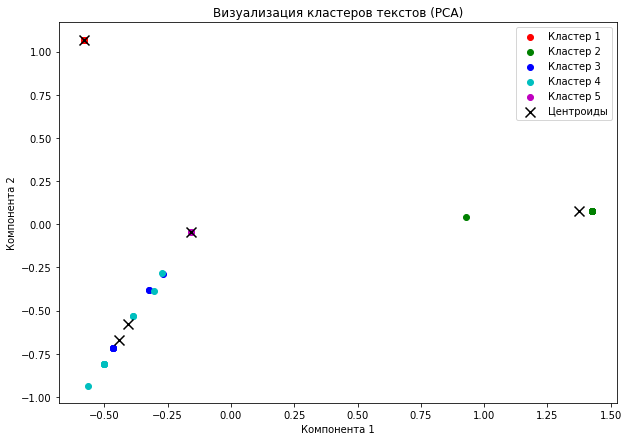

In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Пример текстов
texts = [
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход в систему, Ваше письмо успешно получено, Ваше сообщение успешно отправлено, Выход из системы",
    "Вход в систему, Получение сообщения выполнено, Доставка сообщения выполнена, Выход из системы",
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Собщение прочитано, Сообшение отправлено, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход системы"
]

# Предобработка текста
new = []
for t in texts:
    new.extend(t.split(', '))

# Векторизация текстов с использованием Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new)
'''
Кластеризация текстов с использованием K-Means. Количество кластеров подбиралось
исходя из количества этапов для экземпляра
'''
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Нахождение центроида и выбор наиболее близкого текста
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

print('Bag of Words')
for i in range(num_clusters):
    summary = new[closest[i]]
    print(f"Суммаризация для кластера {i+1}:", summary)

use_tsne = False 

if use_tsne:
    reducer = TSNE(n_components=2, random_state=0)
    X_reduced = reducer.fit_transform(X.toarray())
else:
    reducer = PCA(n_components=2)
    X_reduced = reducer.fit_transform(X.toarray())

# Построение графика
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(num_clusters):
    points = X_reduced[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Кластер {i+1}')

if not use_tsne:
    centroids = reducer.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Центроиды')

plt.title('Визуализация кластеров текстов (PCA)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.show()


Bag of Words
Суммаризация для кластера 1: Вход в систему
Суммаризация для кластера 2: Выход из системы
Суммаризация для кластера 3: Сообщение прочитано
Суммаризация для кластера 4: Сообщение отправлено
Суммаризация для кластера 5: Получение сообщения выполнено


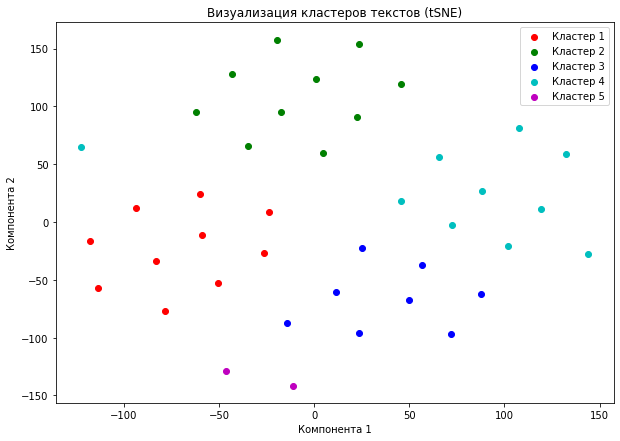

In [16]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Пример текстов
texts = [
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход в систему, Ваше письмо успешно получено, Ваше сообщение успешно отправлено, Выход из системы",
    "Вход в систему, Получение сообщения выполнено, Доставка сообщения выполнена, Выход из системы",
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Собщение прочитано, Сообшение отправлено, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход системы"
]

# Предобработка текста
new = []
for t in texts:
    new.extend(t.split(', '))

# Векторизация текстов с использованием Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(new)
'''
Кластеризация текстов с использованием K-Means. Количество кластеров подбиралось
исходя из количества этапов для экземпляра
'''
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Нахождение центроида и выбор наиболее близкого текста
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

print('Bag of Words')
for i in range(num_clusters):
    summary = new[closest[i]]
    print(f"Суммаризация для кластера {i+1}:", summary)

use_tsne = True 

if use_tsne:
    reducer = TSNE(n_components=2, random_state=0)
    X_reduced = reducer.fit_transform(X.toarray())
else:
    reducer = PCA(n_components=2)
    X_reduced = reducer.fit_transform(X.toarray())

# Построение графика
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(num_clusters):
    points = X_reduced[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Кластер {i+1}')

if not use_tsne:
    centroids = reducer.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Центроиды')

plt.title('Визуализация кластеров текстов (tSNE)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.show()


TF-IDF
Суммаризация для кластера 1: Вход в систему
Суммаризация для кластера 2: Сообщение прочитано
Суммаризация для кластера 3: Выход из системы
Суммаризация для кластера 4: Сообщение отправлено
Суммаризация для кластера 5: Письмо отправлено получателю


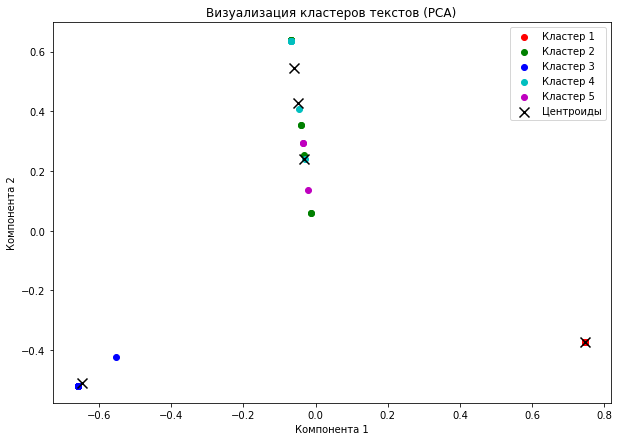

In [17]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Пример текстов
texts = [
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход в систему, Ваше письмо успешно получено, Ваше сообщение успешно отправлено, Выход из системы",
    "Вход в систему, Получение сообщения выполнено, Доставка сообщения выполнена, Выход из системы",
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Собщение прочитано, Сообшение отправлено, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход системы"
]

# Предобработка текста
new = []
for t in texts:
    new.extend(t.split(', '))

# Векторизация текстов с использованием TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new)

# Кластеризация текстов с использованием K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Нахождение центроида и выбор наиболее близкого текста
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

print('TF-IDF')
for i in range(num_clusters):
    summary = new[closest[i]]
    print(f"Суммаризация для кластера {i+1}:", summary)

use_tsne = False

if use_tsne:
    reducer = TSNE(n_components=2, random_state=0)
    X_reduced = reducer.fit_transform(X.toarray())
else:
    reducer = PCA(n_components=2)
    X_reduced = reducer.fit_transform(X.toarray())

# Построение графика
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(num_clusters):
    points = X_reduced[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Кластер {i+1}')

if not use_tsne:
    centroids = reducer.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Центроиды')

plt.title('Визуализация кластеров текстов (PCA)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.show()

TF-IDF
Суммаризация для кластера 1: Вход в систему
Суммаризация для кластера 2: Сообщение прочитано
Суммаризация для кластера 3: Выход из системы
Суммаризация для кластера 4: Сообщение отправлено
Суммаризация для кластера 5: Письмо отправлено получателю


D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


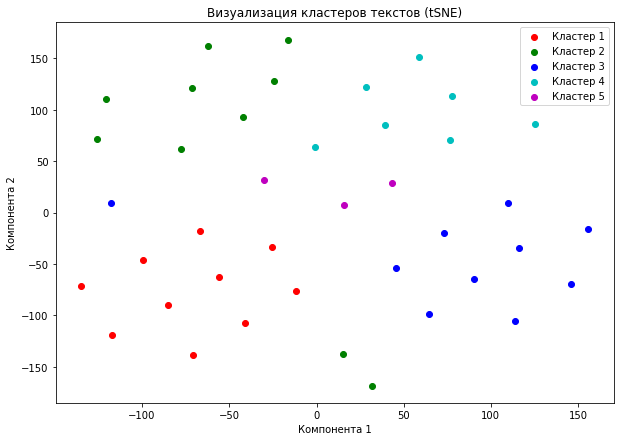

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Пример текстов
texts = [
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход в систему, Ваше письмо успешно получено, Ваше сообщение успешно отправлено, Выход из системы",
    "Вход в систему, Получение сообщения выполнено, Доставка сообщения выполнена, Выход из системы",
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Собщение прочитано, Сообшение отправлено, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход системы"
]

# Предобработка текста
new = []
for t in texts:
    new.extend(t.split(', '))

# Векторизация текстов с использованием TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new)

# Кластеризация текстов с использованием K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Нахождение центроида и выбор наиболее близкого текста
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

print('TF-IDF')
for i in range(num_clusters):
    summary = new[closest[i]]
    print(f"Суммаризация для кластера {i+1}:", summary)

use_tsne = True

if use_tsne:
    reducer = TSNE(n_components=2, random_state=0)
    X_reduced = reducer.fit_transform(X.toarray())
else:
    reducer = PCA(n_components=2)
    X_reduced = reducer.fit_transform(X.toarray())

# Построение графика
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(num_clusters):
    points = X_reduced[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Кластер {i+1}')

if not use_tsne:
    centroids = reducer.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Центроиды')

plt.title('Визуализация кластеров текстов (tSNE)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.show()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word2vec
Суммаризация: Вход в систему
Суммаризация: Сообщение отправлено
Суммаризация: Выход из системы
Суммаризация: Сообщение прочитано
Суммаризация: Письмо отправлено получателю


D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


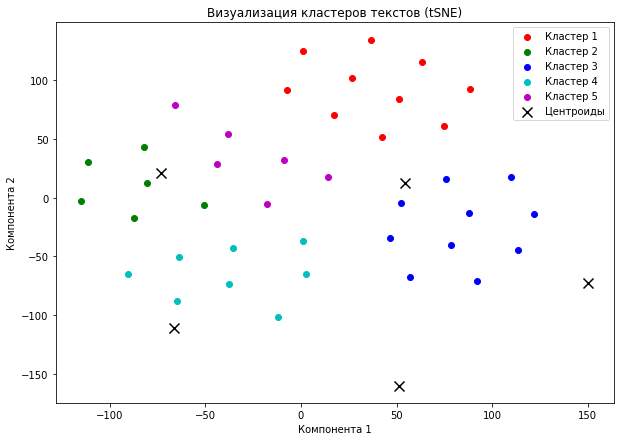

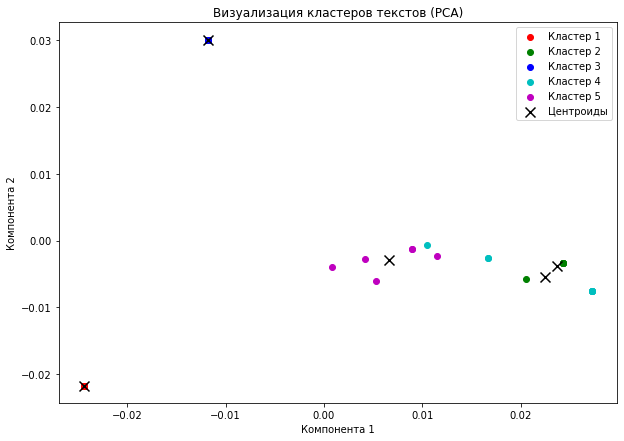

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Пример текстов
texts = [
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход в систему, Ваше письмо успешно получено, Ваше сообщение успешно отправлено, Выход из системы",
    "Вход в систему, Получение сообщения выполнено, Доставка сообщения выполнена, Выход из системы",
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход из системы", 
    "Вход в систему, Собщение прочитано, Сообшение отправлено, Выход из системы", 
    "Вход в систему, Письмо прочитано, Письмо отправлено получателю, Выход из системы", 
    "Вход систему, Прочитано сообщение, Отправлено сообщение, Выход из системы", 
    "Вход в систему, Сообщение прочитано, Сообщение отправлено, Выход системы"
]

new = []
for t in texts:
    new.extend(t.split(', '))
texts = new.copy()

# Предобработка текста - токенизация, удаление стоп-слов, лемматизация
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

tokenized_texts = [preprocess_text(text) for text in texts]


w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Векторизация текстов с использованием word2vec
def text_vector(text, model):
    words = preprocess_text(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = np.array([text_vector(text, w2v_model) for text in texts])

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

print('Word2vec')
for i in range(5):
    summary = new[closest[i]]
    print("Суммаризация:", summary)

# Визуализация кластеров
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(10, 7))
    colors = ['r', 'g', 'b', 'c', 'm']
    for i in range(num_clusters):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Кластер {i+1}')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Центроиды')
    plt.title(title)
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.legend()
    plt.show()

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
plot_clusters(X_tsne, kmeans.labels_, tsne.fit_transform(kmeans.cluster_centers_), 'Визуализация кластеров текстов (tSNE)')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_clusters(X_pca, kmeans.labels_, pca.transform(kmeans.cluster_centers_), 'Визуализация кластеров текстов (PCA)')
